In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### HISTOGRAM OF WATERMARKED VS NOT WATERMARKED




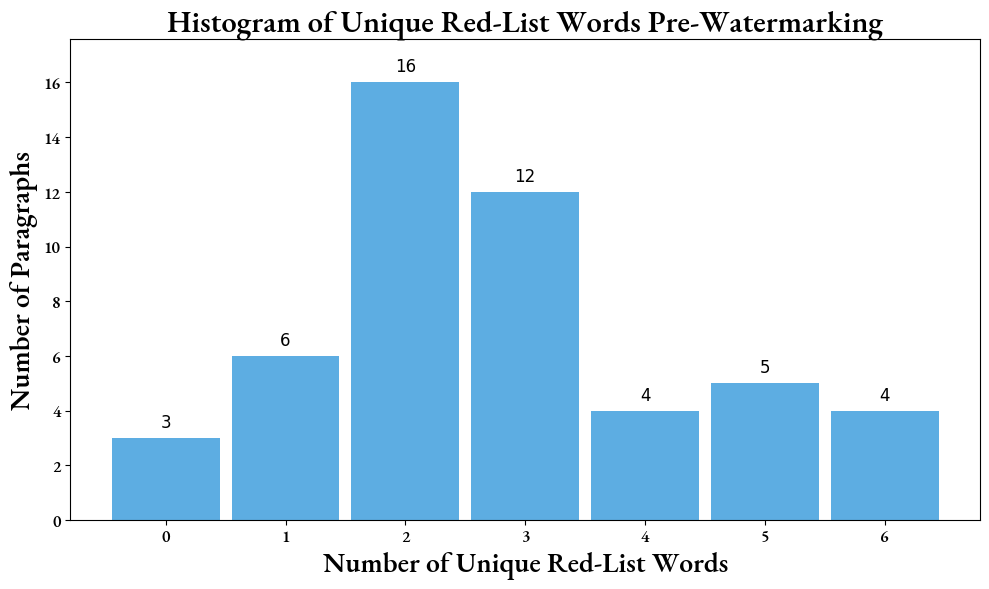

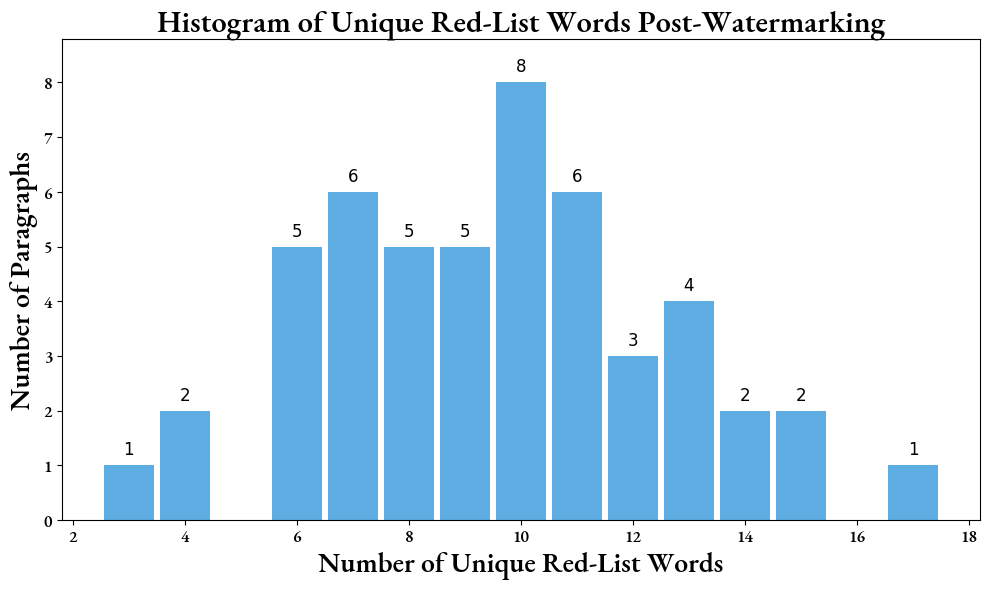

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib.font_manager import FontProperties

# Define custom font properties
custom_fp = FontProperties(fname='/content/EBGaramond-SemiBold.ttf', size=12)

def read_red_list(filename):
    """Reads the red-list words from a file, returns a list of words."""
    with open(filename, 'r') as file:
        red_list = file.read().lower().split(', ')
    return red_list

def clean_red_list(words_list):
    """Removes punctuation and extra spaces from the words in the list."""
    cleaned_list = [word.replace("‘", "").replace("’", "").replace("'", "").strip() for word in words_list]
    return cleaned_list

def count_unique_red_list_words(text, red_list):
    """Counts unique occurrences of exact red-list words in a given text."""
    text_clean = re.sub(r'[^\w\s]', '', text.lower())
    words = text_clean.split()
    unique_red_list_words = set(word for word in words if word in red_list)
    return len(unique_red_list_words)

def plot_histogram(data, title, filename):
    """Plots a histogram of the data, saves it to a file with 400 DPI, and shows the plot."""
    plt.figure(figsize=(10, 6))

    # Adding spacing between bars by setting `rwidth`
    counts, bins, patches = plt.hist(data, bins=range(min(data), max(data) + 2), align='left', color='#5dade2', edgecolor='none', rwidth=0.9)

    for count, rect in zip(counts, patches):
        height = int(count)
        if height > 0:
            plt.annotate(f'{height}',
                         xy=(rect.get_x() + rect.get_width() / 2, height),
                         xytext=(0, 5),  # Add vertical space above each bar annotation
                         textcoords="offset points",
                         ha='center', va='bottom', fontsize=12, color='black')

    # Create FontProperties for larger Garamond font sizes
    large_font = FontProperties(fname='/content/EBGaramond-SemiBold.ttf', size=22)
    medium_font = FontProperties(fname='/content/EBGaramond-SemiBold.ttf', size=20)
    small_font = FontProperties(fname='/content/EBGaramond-SemiBold.ttf', size=12)

    # Set title and labels with custom FontProperties
    plt.title(title, fontproperties=large_font, weight='bold')
    plt.xlabel('Number of Unique Red-List Words', fontproperties=medium_font, weight='bold')
    plt.ylabel('Number of Paragraphs', fontproperties=medium_font, weight='bold')
    plt.xticks(fontsize=12, fontproperties=small_font)
    plt.yticks(fontsize=12, fontproperties=small_font)
    plt.grid(False)  # Remove grid lines

    # Add vertical padding for the plot limits
    plt.ylim(0, max(counts) + max(counts) * 0.1)  # 10% extra vertical space
    plt.tight_layout()

    # Save the plot with 400 DPI
    plt.savefig(filename, dpi=400, bbox_inches='tight')
    plt.show()

def process_spreadsheet(file_path, red_list):
    """Processes the spreadsheet and returns a list of unique red-list word counts for each paragraph."""
    df = pd.read_excel(file_path, header=None)
    return [count_unique_red_list_words(row[1], red_list) for index, row in df.iterrows()]

def main():
    # File paths and red-list filename
    NotWatermarkedText = '/content/drive/MyDrive/SAFEGEN: Rcomp/Watermarking/NotWatermarkedText - 1.xlsx'
    WatermarkedText = '/content/drive/MyDrive/SAFEGEN: Rcomp/Watermarking/WatermarkedText - 4.xlsx'
    red_list_file = '/content/drive/MyDrive/SAFEGEN: Rcomp/Watermarking/RedList - 2 (Technology & Science).txt'

    # Read and clean the red-list words
    red_list = clean_red_list(read_red_list(red_list_file))

    # Process each spreadsheet for unique red-list word counts
    counts_pre_watermarking = process_spreadsheet(NotWatermarkedText, red_list)
    counts_post_watermarking = process_spreadsheet(WatermarkedText, red_list)

    # Plot histograms for both datasets and save them as separate files
    plot_histogram(counts_pre_watermarking, 'Histogram of Unique Red-List Words Pre-Watermarking', 'pre_watermarking_histogram.png')
    plot_histogram(counts_post_watermarking, 'Histogram of Unique Red-List Words Post-Watermarking', 'post_watermarking_histogram.png')

if __name__ == "__main__":
    main()


In [ ]:
import pandas as pd
import re

def read_red_list(filename):
    """Reads the red-list words from a file, returns a list of words."""
    with open(filename, 'r') as file:
        red_list = file.read().lower().split(', ')
    return red_list

def clean_red_list(words_list):
    # Remove single quotes from each word in the list
    cleaned_list = [word.replace("‘", "").replace("’", "").replace("'", "").strip() for word in words_list]
    return cleaned_list

def count_unique_red_list_words(text, red_list):
    """Counts unique occurrences of exact red-list words in a given text."""
    # Remove punctuation from the text
    text_clean = re.sub(r'[^\w\s]', '', text.lower())
    words = text_clean.split()
    # Use a set to count each red-list word only once per paragraph
    unique_red_list_words = set(word for word in words if word in red_list)
    return len(unique_red_list_words)

def process_spreadsheet_and_find_exact(file_path, red_list, target_count=5):
    """Processes the spreadsheet and finds paragraphs with exactly `target_count` unique red-list words."""
    # Reads the file without assuming the first row as headers
    df = pd.read_excel(file_path, header=None)

    paragraphs_with_target_count = []

    # Iterate through each row and count red-list words
    for index, row in df.iterrows():
        paragraph_text = row[1]  # Assuming the paragraph text is in the second column
        unique_count = count_unique_red_list_words(paragraph_text, red_list)

        # Check if this paragraph has the target count of red-list words
        if unique_count == target_count:
            paragraphs_with_target_count.append((index, paragraph_text))

    return paragraphs_with_target_count

def main():
    # File paths and red-list filename
    WatermarkedText = '/content/drive/MyDrive/SAFEGEN: Rcomp/Watermarking/WatermarkedText - 4.xlsx'
    red_list_file = '/content/drive/MyDrive/SAFEGEN: Rcomp/Watermarking/RedList - 2 (Technology & Science).txt'

    # Read and clean the red-list words
    red_list = clean_red_list(read_red_list(red_list_file))

    # Find paragraphs with exactly 5 unique red-list words
    paragraphs_with_five_red_list_words = process_spreadsheet_and_find_exact(WatermarkedText, red_list, target_count=5)

    # Print the results
    for index, paragraph in paragraphs_with_five_red_list_words:
        print(f"Paragraph {index + 1}:")
        print(paragraph)
        print("-----")

if __name__ == "__main__":
    main()


Paragraph 30:

A computer system is composed of multiple essential components that work together to process and manage data effectively. At its core, it includes the central processing unit (CPU), which drives all fundamental calculations and operations, and the memory, where data and instructions are temporarily stored. Storage devices, like hard drives or solid-state drives, are responsible for maintaining data even when the system is powered off. The system architecture determines how these components interact, influencing the computer’s speed and capability. Input devices, such as keyboards or sensors, gather data, while output devices, like monitors, display processed information. Power management ensures efficient energy use, keeping components safe from hazardous conditions. Software is the intangible part that directs hardware to perform specific tasks, with applications and utilities providing functionality and user interaction. Finally, connectivity options, including network

## Find Which Texts are Succesful

In [ ]:
import pandas as pd
import re

def read_red_list(filename):
    """Reads the red-list words from a file, returns a list of words."""
    with open(filename, 'r') as file:
        red_list = file.read().lower().split(', ')
    return red_list

def clean_red_list(words_list):
    """Removes single quotes and extra spaces from each word in the list."""
    cleaned_list = [word.replace("‘", "").replace("’", "").replace("'", "").strip() for word in words_list]
    return cleaned_list

def count_red_list_words(text, red_list):
    """Counts the red-list words in a given text."""
    # Remove punctuation from the text
    text_clean = re.sub(r'[^\w\s]', '', text.lower())
    words = text_clean.split()
    count = sum(word in red_list for word in words)
    return count

def process_spreadsheet(file_path, red_list):
    """Processes the spreadsheet and returns a list of red-list word counts for each paragraph."""
    df = pd.read_excel(file_path, header=None)
    counts = [count_red_list_words(row[1], red_list) for index, row in df.iterrows()]
    return df[1], counts

def find_paragraph_indices(paragraphs, counts, condition):
    """Finds indices of paragraphs that meet a specific condition."""
    return [index for index, count in enumerate(counts) if condition(count)]

def main():
    # File paths and red-list filename
    NotWatermarkedText = '/content/drive/MyDrive/SAFEGEN: Rcomp/Watermarking/NotWatermarkedText - 1.xlsx'
    WatermarkedText = '/content/drive/MyDrive/SAFEGEN: Rcomp/Watermarking/WatermarkedText - 4.xlsx'
    red_list_file = '/content/drive/MyDrive/SAFEGEN: Rcomp/Watermarking/RedList - 2 (Technology & Science).txt'

    # Read the red-list words from the file
    red_list = read_red_list(red_list_file)

    # Clean the red list words
    cleaned_red_list = clean_red_list(red_list)

    # Process each spreadsheet
    paragraphs1, counts1 = process_spreadsheet(NotWatermarkedText, cleaned_red_list)
    paragraphs2, counts2 = process_spreadsheet(WatermarkedText, cleaned_red_list)

    # Find paragraphs with 3 or more red-list words in non-watermarked text
    non_watermarked_indices = find_paragraph_indices(paragraphs1, counts1, lambda x: x >= 7)
    # Find paragraphs with less than 3 red-list words in watermarked text
    watermarked_indices = find_paragraph_indices(paragraphs2, counts2, lambda x: x < 7)

    # Output the results
    print("Non-Watermarked Text Paragraphs with 7+ Red-List Words:")
    for index in non_watermarked_indices:
        print(f"Paragraph {index + 1}: {paragraphs1.iloc[index]}")

    print("\nWatermarked Text Paragraphs with Less Than 7 Red-List Words:")
    for index in watermarked_indices:
        print(f"Paragraph {index + 1}: {paragraphs2.iloc[index]}")

if __name__ == "__main__":
    main()

Non-Watermarked Text Paragraphs with 7+ Red-List Words:
Paragraph 10: Robotics involves designing, building, and operating robots, which are automated machines that can perform tasks typically done by humans. At its core, robotics integrates fields like mechanical engineering, electrical engineering, and computer science to create and control these machines. Mechanical engineering contributes to the design and construction of the robot's body and moving parts. Electrical engineering is crucial for wiring and powering the robot, ensuring it can receive and execute commands. Computer science plays a vital role through programming, enabling the robot to process information and make decisions. This combination allows robots to perform a wide range of tasks, from simple repetitive activities to complex actions requiring adaptive and intelligent behavior. Robots are increasingly used in industries like manufacturing, healthcare, and even in homes for various tasks such as assembly, surgery, 

## Which words are Present in the Text?

In [5]:
import re

def read_red_list(filename):
    """Reads the red-list words from a file, returns a list of words."""
    with open(filename, 'r') as file:
        red_list = file.read().lower().split(', ')
    return red_list

def clean_red_list(words_list):
    # Remove single quotes from each word in the list
    cleaned_list = [word.replace("‘", "").replace("’", "").replace("'", "").strip() for word in words_list]
    return cleaned_list

def find_and_count_red_list_words(paragraph, red_list):
    """Identifies and counts occurrences of red-list words in a given paragraph."""
    # Remove punctuation from the paragraph
    paragraph_clean = re.sub(r'[^\w\s]', '', paragraph.lower())
    words = paragraph_clean.split()
    found_words = set(words) & set(red_list)
    word_counts = {word: words.count(word) for word in found_words}
    return word_counts

def main():
    # Example paragraph and red-list file path
    paragraph = "The basic principle behind a laser is to facilitate a process where energy is directed to a medium, often in the form of an electron, that can emit light of a distinct wavelength. When this energy is applied, the medium’s atoms get excited and release photons in a controlled, consistent way. These photons, which are emitted at the same wavelength, align and amplify each other through a process called stimulated emission, resulting in a coherent light beam. The laser operates by reflecting the photons back and forth between mirrors within an optical cavity, causing them to gain intensity as they pass through the medium multiple times. This carefully measured and precise alignment enables lasers to generate a high degree of accuracy in applications ranging from diagnostics and fluorescence in science to commercial and industrial uses. This technology makes lasers especially useful in fields requiring exact and reliable responses."
    red_list_file = '/content/drive/MyDrive/SAFEGEN: Rcomp/Watermarking/RedList - 3 (Technology & Science).txt'

    # Read the red-list words from the file
    red_list = read_red_list(red_list_file)

    # Clean the red list words
    cleaned_red_list = clean_red_list(red_list)

    red_list = cleaned_red_list

    # Find red-list words and count their occurrences in the paragraph
    word_counts = find_and_count_red_list_words(paragraph, red_list)

    # Format and print the output
    total_words_found = sum(word_counts.values())
    print(f"Total Red-List Words Found: {len(word_counts)}\n")
    print("Red-List Words in Paragraph:")
    for word, count in word_counts.items():
        print(f"- {word} ({count})")
    print(f"\nCounted as: {total_words_found}")

if __name__ == "__main__":
    main()


Total Red-List Words Found: 9

Red-List Words in Paragraph:
- commercial (1)
- electron (1)
- consistent (1)
- especially (1)
- distinct (1)
- measured (1)
- facilitate (1)
- fluorescence (1)
- optical (1)

Counted as: 9


## CONFUSION MATRIX - String


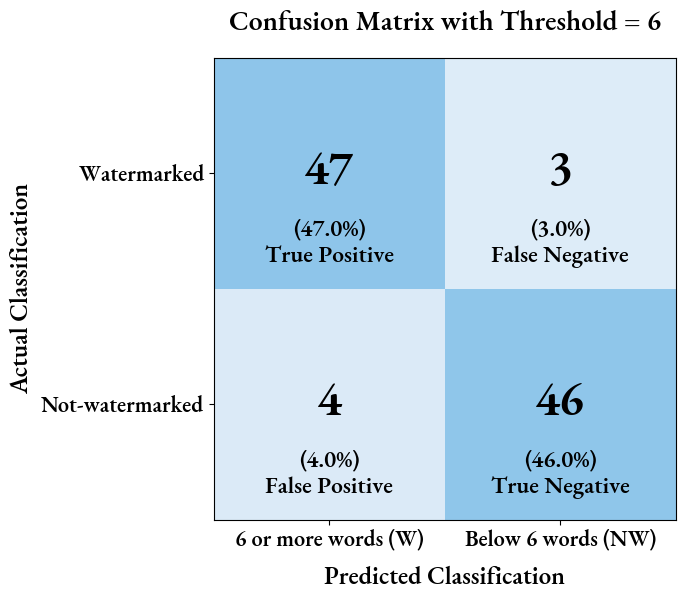

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.font_manager import FontProperties
import numpy as np

def read_red_list(filename):
    """Reads the red-list words from a file, returns a list of words."""
    with open(filename, 'r') as file:
        red_list = file.read().lower().split(', ')
    return red_list

def clean_red_list(words_list):
    """Removes punctuation and extra spaces from the words in the list."""
    cleaned_list = [word.replace("‘", "").replace("’", "").replace("'", "").strip() for word in words_list]
    return cleaned_list

def count_red_list_words(text, red_list):
    """Counts unique occurrences of red-list words in a given text."""
    text_clean = re.sub(r'[^\w\s]', '', text.lower())
    unique_words = set(text_clean.split())
    return sum(word in red_list for word in unique_words)

def process_spreadsheet(file_path, red_list):
    """Processes the spreadsheet and counts unique red-list words for each paragraph."""
    df = pd.read_excel(file_path, header=None)
    return [count_red_list_words(row[1], red_list) for index, row in df.iterrows()]

def compute_confusion_matrix(counts1, counts2, threshold):
    """Computes the confusion matrix based on the given threshold for unique red-list words."""
    TP = sum(count >= threshold for count in counts2)
    FN = sum(count < threshold for count in counts2)
    FP = sum(count >= threshold for count in counts1)
    TN = sum(count < threshold for count in counts1)
    return np.array([[TP, FN], [FP, TN]])

def plot_confusion_matrix(cm, threshold):
    """Plots a confusion matrix with custom styling."""
    # Define font properties (adjust path as needed for your environment)
    custom_fp = FontProperties(fname='/content/EBGaramond-SemiBold.ttf', size=12)

    # Create a custom blue colormap
    blue_cmap = LinearSegmentedColormap.from_list('blue_cmap', ['#cfe4f5', '#5dade2'])

    # Calculate percentages
    cm_percent = cm / cm.sum() * 100
    labels = np.array([["True Positive", "False Negative"],
                       ["False Positive", "True Negative"]])

    # Plotting the confusion matrix
    fig, ax = plt.subplots(figsize=(6, 6))
    cax = ax.matshow(cm, cmap=blue_cmap, alpha=0.7)

    # Add values and percentages inside each cell with different font sizes
    for (i, j), val in np.ndenumerate(cm):
        percentage = cm_percent[i, j]

        # Print the main number in larger font
        ax.text(j, i, f'{val}', ha='center', va='center',
                fontproperties=custom_fp, color='black', fontsize=35, weight='bold')

        # Print the percentage and label in smaller font beneath the main number
        ax.text(j, i + 0.2, f'({percentage:.1f}%)\n{labels[i, j]}', ha='center', va='top',
                fontproperties=custom_fp, color='black', fontsize=17)

    # Setting labels and title with custom font and larger size
    ax.set_xlabel('Predicted Classification', fontproperties=custom_fp, fontsize=18, labelpad=10)
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()
    ax.set_ylabel('Actual Classification', fontproperties=custom_fp, fontsize=18)
    ax.set_title(f'Confusion Matrix with Threshold = {threshold}', fontproperties=custom_fp, fontsize=20, pad=20)

    # Custom tick labels
    ax.set_xticks([0, 1])
    ax.set_xticklabels([f'{threshold} or more words (W)', f'Below {threshold} words (NW)'], fontproperties=custom_fp, fontsize=16)
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['Watermarked', 'Not-watermarked'], fontproperties=custom_fp, fontsize=16)

    # Save and show the plot
    plt.savefig('confusion_matrix.png', dpi=400, bbox_inches='tight')
    plt.show()


def main():
    NotWatermarkedText = '/content/drive/MyDrive/SAFEGEN: Rcomp/Watermarking/NotWatermarkedText - 1.xlsx'
    WatermarkedText = '/content/drive/MyDrive/SAFEGEN: Rcomp/Watermarking/WatermarkedText - 4.xlsx'
    red_list_file = '/content/drive/MyDrive/SAFEGEN: Rcomp/Watermarking/RedList - 2 (Technology & Science).txt'
    threshold = 6

    red_list = read_red_list(red_list_file)
    cleaned_red_list = clean_red_list(red_list)

    counts1 = process_spreadsheet(NotWatermarkedText, cleaned_red_list)
    counts2 = process_spreadsheet(WatermarkedText, cleaned_red_list)

    cm = compute_confusion_matrix(counts1, counts2, threshold)
    plot_confusion_matrix(cm, threshold)

if __name__ == "__main__":
    main()


## CONFUSION MATRIX - Words

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


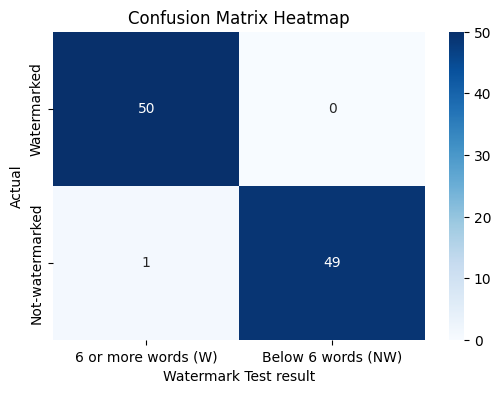

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK resources
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

def read_red_list(filename):
    """Reads the red-list words from a file, returns a list of words."""
    with open(filename, 'r') as file:
        red_list = file.read().lower().split(', ')
    return red_list

def clean_red_list(words_list):
    """Removes punctuation and extra spaces from the words in the list."""
    cleaned_list = [word.replace("‘", "").replace("’", "").replace("'", "").strip() for word in words_list]
    return cleaned_list

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def count_red_list_words(text, red_list):
    """Counts unique lemmatized occurrences of red-list words in a given text."""
    lemmatizer = WordNetLemmatizer()
    text_clean = re.sub(r'[^\w\s]', '', text.lower())
    words = text_clean.split()
    lemmatized_words = set([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in words])
    lemmatized_red_list = set([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in red_list])
    return sum(word in lemmatized_red_list for word in lemmatized_words)


# def count_red_list_words(text, red_list):
#     """Counts occurrences of lemmatized red-list words in a given text."""
#     lemmatizer = WordNetLemmatizer()
#     text_clean = re.sub(r'[^\w\s]', '', text.lower())
#     words = text_clean.split()
#     lemmatized_words = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in words]
#     lemmatized_red_list = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in red_list]
#     return sum(word in lemmatized_red_list for word in lemmatized_words)

def process_spreadsheet(file_path, red_list):
    """Processes the spreadsheet and counts lemmatized red-list words for each paragraph."""
    df = pd.read_excel(file_path, header=None)
    return [count_red_list_words(row[1], red_list) for index, row in df.iterrows()]

def compute_confusion_matrix(counts1, counts2, threshold):
    """Computes the confusion matrix based on the given threshold for lemmatized red-list words."""
    TP = sum(count >= threshold for count in counts2)
    FN = sum(count < threshold for count in counts2)
    FP = sum(count >= threshold for count in counts1)
    TN = sum(count < threshold for count in counts1)
    return TP, FN, FP, TN

def plot_confusion_matrix(cm, threshold):
    """Plots a confusion matrix heatmap."""
    TP, FN, FP, TN = cm
    matrix = [[TP, FN], [FP, TN]]
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues',
                xticklabels=[f'{threshold} or more words (W)', f'Below {threshold} words (NW)'],
                yticklabels=['Watermarked', 'Not-watermarked'])
    plt.title('Confusion Matrix Heatmap')
    plt.ylabel('Actual')
    plt.xlabel('Watermark Test result')
    plt.show()

def main():
    NotWatermarkedText = '/content/drive/MyDrive/SAFEGEN: Rcomp/Watermarking/NotWatermarkedText - 1.xlsx'
    WatermarkedText = '/content/drive/MyDrive/SAFEGEN: Rcomp/Watermarking/WatermarkedText - 5.xlsx'
    red_list_file = '/content/drive/MyDrive/SAFEGEN: Rcomp/Watermarking/RedList - 3 (Technology & Science).txt'

    red_list = read_red_list(red_list_file)
    cleaned_red_list = clean_red_list(red_list)

    counts1 = process_spreadsheet(NotWatermarkedText, cleaned_red_list)
    counts2 = process_spreadsheet(WatermarkedText, cleaned_red_list)

    threshold = 6

    cm = compute_confusion_matrix(counts1, counts2, threshold)
    plot_confusion_matrix(cm, threshold)

if __name__ == "__main__":
    main()